# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [44]:
df = pd.read_csv('ecommerce_preparados.csv')

# Verificando a disposição dos dados
df.head()


,Unnamed: 0,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,...,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Marca_Cod,Material_Cod,Temporada_Cod,Qtd_Vendidos_Cod,Marca_Freq,Material_Freq
0,0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,4.0,273.0,NaN,toronto uniformes profissionais,poliéster,Sem gênero,não definido,"Preço justo , bem feito acabamento ok. Única s...",...,0.629630,0.029969,NaN,0.100645,781,122,1,1000.0,0.002274,0.117326
1,1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,4.5,3034.0,18.0,lupo,algodão,Masculino,outono/inverno,As cuecas são boas; porém você percebe na cost...,...,0.814815,0.334178,0.213115,0.378585,463,25,3,10000.0,0.042292,0.176444
2,2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,4.7,5682.0,20.0,zorba,algodão,Masculino,não definido,O tecido é bom e são confortáveis. Só que a nu...,...,0.888889,0.625937,0.245902,0.322329,838,25,1,50000.0,0.009095,0.176444
3,3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,4.6,1700.0,22.0,mash,algodão,Masculino,primavera/verão,"As cuecas são boas, porém meu marido usa g e p...",...,0.851852,0.187197,0.278689,0.372617,494,25,7,10000.0,0.010914,0.176444
4,4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,4.4,507.0,9.0,menina linda,jean,Feminino,primavera/verão,Estou encantada com essas peças!.\nOs shorts s...,...,0.777778,0.055751,0.065574,0.201767,509,74,7,1000.0,0.010005,0.025466


In [45]:
# Mostra as colunas
print(df.columns)

Index(['Unnamed: 0', 'Título', 'Nota', 'N_Avaliações', 'Desconto', 'Marca',
       'Material', 'Gênero', 'Temporada', 'Review1', 'Review2', 'Review3',
       'Qtd_Vendidos', 'Preço', 'Nota_MinMax', 'N_Avaliações_MinMax',
       'Desconto_MinMax', 'Preço_MinMax', 'Marca_Cod', 'Material_Cod',
       'Temporada_Cod', 'Qtd_Vendidos_Cod', 'Marca_Freq', 'Material_Freq'],
      dtype='object')


In [46]:
# Codificando os valores de gênero para avaliação de correlação
df['Gênero_cod'] = df['Gênero'].astype('category').cat.codes

In [47]:
#função de conversão de categorias de vendas em valores numéricos
def converte_vendas(valor):
    if isinstance(valor, str):
        if '+10mil' in valor:
            return 10000
        elif '+1000' in valor:
            return 1000
        elif '+500' in valor:
            return 500
        elif '+100' in valor:
            return 100
        elif '+50' in valor:
            return 50
        elif '+25' in valor:
            return 25
        elif '+5mil' in valor:
            return 5000
        elif '+5' in valor:
            return 5
        elif 'Nenhum' in valor:
            return 0
    return np.nan

# Aplica a função na coluna 'Qtd_Vendidos'
df['Qtd_Vendidos_Numerico'] = df['Qtd_Vendidos'].apply(converte_vendas)

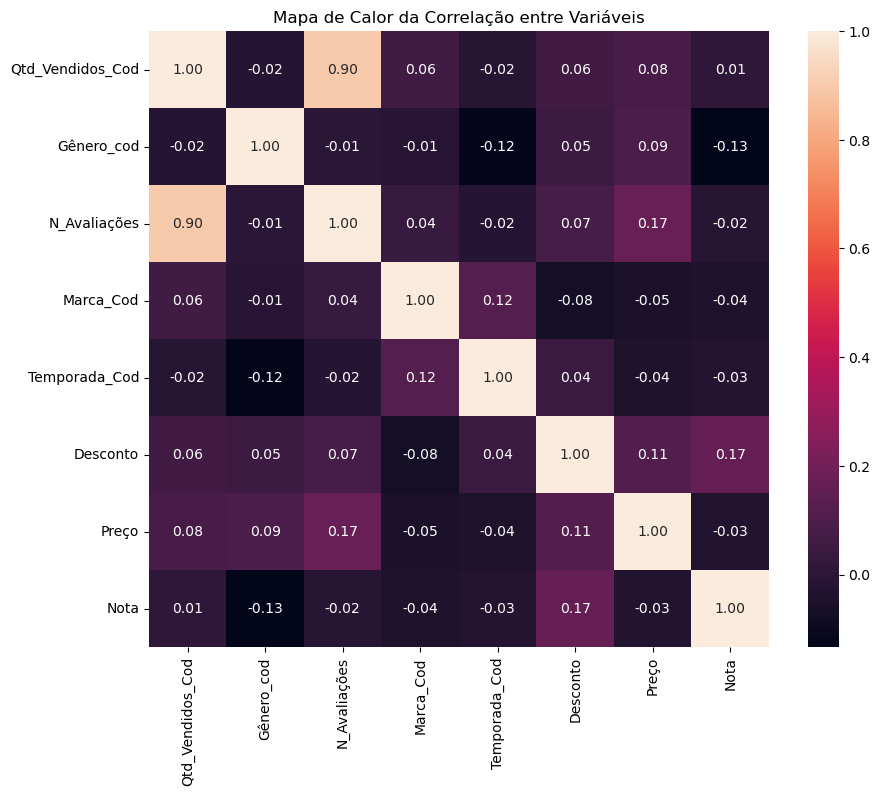

In [56]:
# Avaliando as correlações 
df_corr = df[['Qtd_Vendidos_Cod','Gênero_cod', 'N_Avaliações', 'Marca_Cod', 'Temporada_Cod', 'Desconto', 'Preço', 'Nota']].corr()
# Mapa de calor de correlação
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()

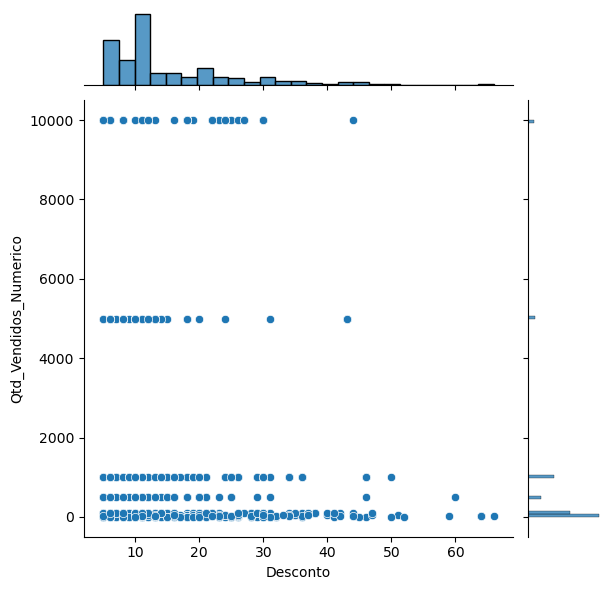

In [53]:
# Gráfico de Dispersão - Verificando a dispersão 
sns.jointplot(x='Desconto', y='Qtd_Vendidos_Numerico', data=df, kind='scatter') 
plt.show()

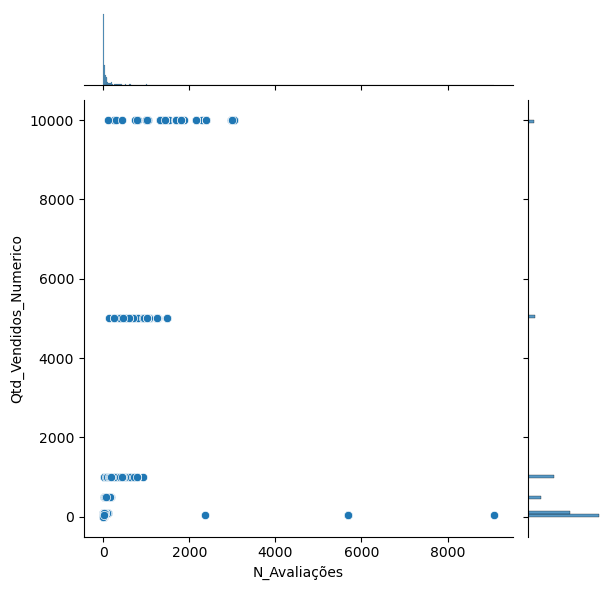

In [49]:
# Gráfico de Dispersão - Verificando a dispersão 
sns.jointplot(x='N_Avaliações', y='Qtd_Vendidos_Numerico', data=df, kind='scatter') 
plt.show()

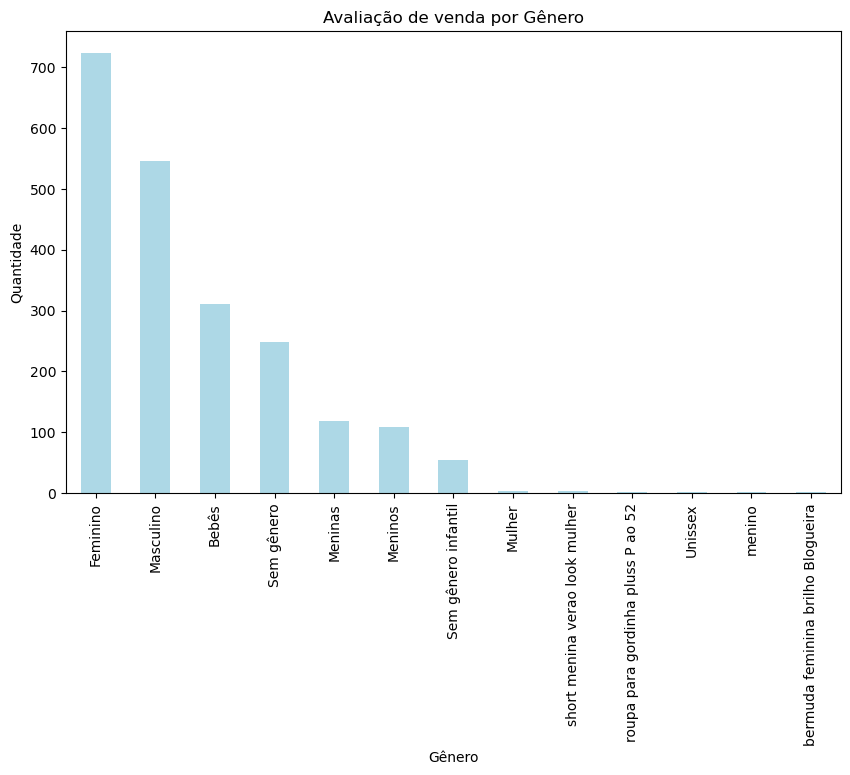

In [28]:
# Gráfico de Barras - Avaliando as vendas por Gênero
plt.figure(figsize=(10,6))
df['Gênero'].value_counts().plot(kind='bar', color='#ADD8E6') 
plt.title('Avaliação de venda por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

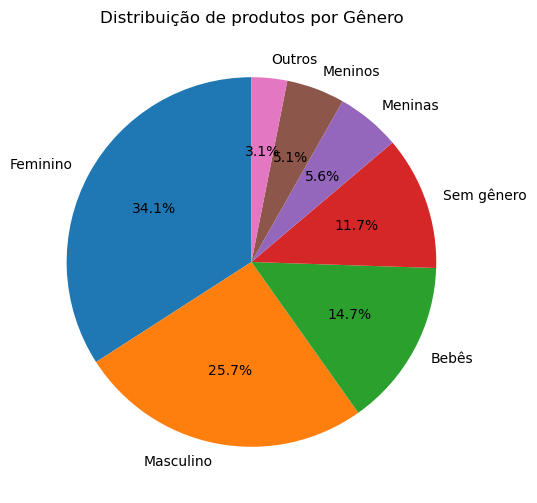

In [40]:
# Gráfico de pizza - Avaliando a distrubuição de produtos por Gênero

# Limite de agrupamento
limite = 0.05  # 5%

# Calcula a porcentagem dos valores
value_counts = df['Gênero'].value_counts(normalize=True)

# Separa as categorias que são maiores que o limite
fatias_maiores = value_counts[value_counts > limite]
fatias_menores = value_counts[value_counts <= limite]

# Soma as fatias pequenas e renomeia para "Outros"
if len(fatias_menores) > 0:
    fatias_maiores['Outros'] = fatias_menores.sum()

# Prepara os dados para o gráfico
labels = fatias_maiores.index
sizes = fatias_maiores.values

# Cria o gráfico de pizza
plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Distribuição de produtos por Gênero')

plt.show()

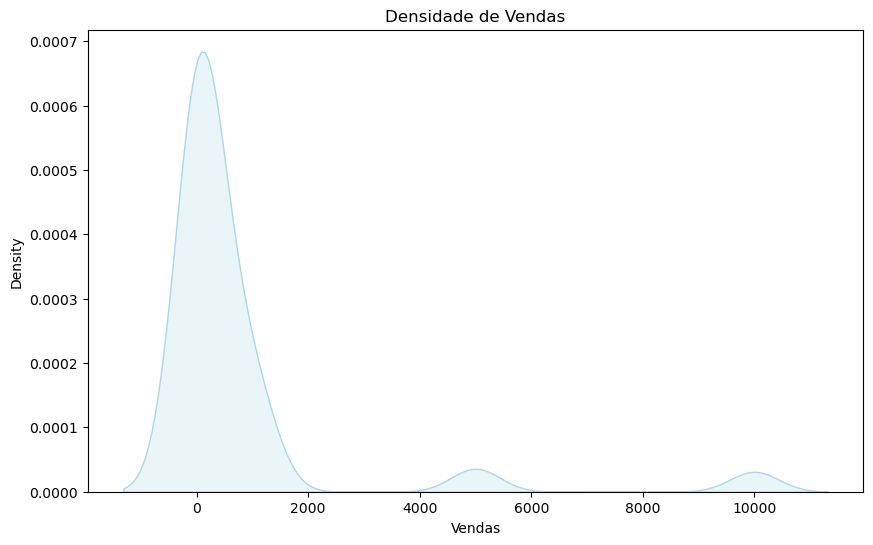

In [50]:
# Gráfico de Densidade - Avaliação da densidade de vendas
plt.figure(figsize=(10,6))
sns.kdeplot(df['Qtd_Vendidos_Numerico'], fill=True, color='#ADD8E6')
plt.title('Densidade de Vendas')
plt.xlabel('Vendas')
plt.show()

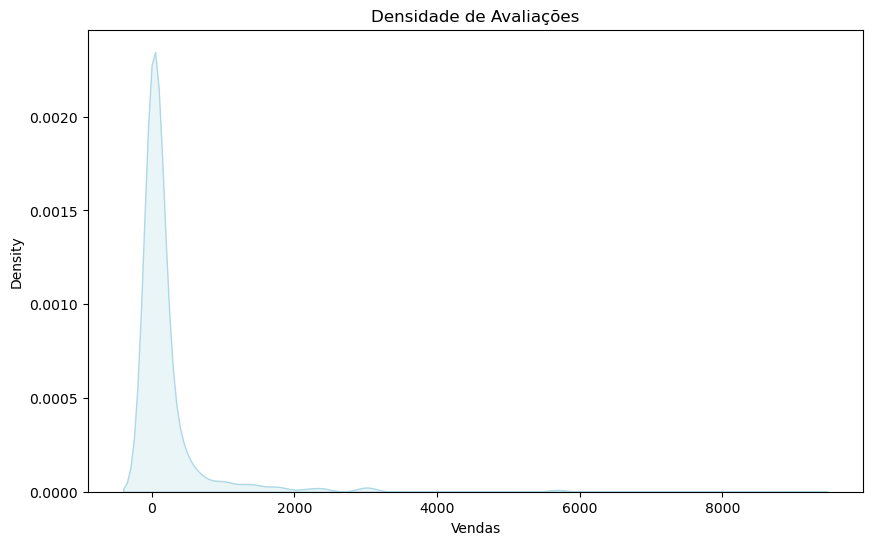

In [54]:
# Gráfico de Densidade - Avaliação da densidade de avaliações
plt.figure(figsize=(10,6))
sns.kdeplot(df['N_Avaliações'], fill=True, color='#ADD8E6')
plt.title('Densidade de Avaliações')
plt.xlabel('Vendas')
plt.show()